# Messi vs Ronaldo - An Analytical Debate

## **Notes for mega-webinar**
- We will focus purely on the analytical process here and not on python.
- This notebook will be shared after the session has been concluded.
- Keep the chatter and banter to the minimum on the chat window and let's focus on the topic on-hand :)

## **Important tips and tricks for Football Analytics**
1. Analytics is a marathon and not a sprint
1. Conclusions are dangerous. Analytically-supported observations and opinions are true outputs of football analysis.
1. Start from the broadest level possible and then start digging in.
1. Improve your typing speed

## Flow of the Webinar:
1. Get data from [Understat](https://understat.com/) for Messi and Ronaldo
3. Data Cleaning and EDA
3. Comparative Analysis
3. **Debate - 2 Rounds**
3. Shot Analysis
2. Distance Analysis
3. The Final comparison
3. **Debate - 3rd Round**
3. Who Won?

In [1]:
# Import required libraries:
import json
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen

# Import plotting libraries:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Get that Data!

## Cristiano Ronaldo

### Season-wise data

In [2]:
# Scrape Cristiano player stats:
cris_scrape_url = "https://understat.com/player/2371"
page_connect = urlopen(cris_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

cris_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
cris_season_wise_meta_df.insert(0, "Player", "Cristiano")

In [3]:
cris_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,FW,16,8,57,1300,9.91887341439724,3,1.6593726500868797,12,2021,Manchester United,4,0,6,8.39653579890728,11.537003859877586,2.896052235737443
1,Cristiano,Sub,1,0,1,28,0.20496894419193268,0,0.03537696972489357,1,2021,Juventus,1,0,0,0.20496894419193268,0.051310088485479355,0.015933118760585785
2,Cristiano,FW,33,29,167,2807,29.83808070421219,3,3.8546393513679504,36,2020,Juventus,3,0,23,23.74781009554863,28.635406404733658,8.915717896074057
3,Cristiano,FWL,33,31,208,2920,29.431679474189878,5,6.067225832492113,51,2019,Juventus,3,0,19,19.53495633788407,26.5536093339324,7.224641568958759
4,Cristiano,FW,31,21,175,2692,23.32403990253806,8,5.193873833864927,48,2018,Juventus,3,0,16,18.75628685578704,21.854169853031635,7.177339139394462
5,Cristiano,FW,27,26,178,2304,26.999303579330444,5,5.524841643869877,40,2017,Real Madrid,1,0,23,24.02619305253029,31.62383733689785,9.47185287065804
6,Cristiano,FWL,29,25,162,2546,25.413737758994102,6,4.591035931371152,31,2016,Real Madrid,4,0,19,19.467644795775414,29.57457834482193,8.661094894632697
7,Cristiano,AML,36,35,227,3186,35.58900645375252,11,8.606404347345233,51,2015,Real Madrid,3,0,29,28.899507626891136,40.81802845001221,9.863004602491856
8,Cristiano,FWL,35,48,225,3103,39.30876067932695,16,13.600642347708344,76,2014,Real Madrid,5,1,38,30.389685845933855,43.60801999177784,7.5202372539788485


### Shots Data

In [4]:
# Scrape Cristiano shot data:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

cris_shots_df = pd.json_normalize(json.loads(json_data))
cris_shots_df.insert(0, "Player", "Cristiano")

In [5]:
cris_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.845,0.49900001525878906,0.06659495085477829,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.7680000305175781,0.625,0.03090905211865902,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.7080000305175781,0.6719999694824219,0.022334257140755653,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.8159999847412109,0.245,0.02082291804254055,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.885,0.5,0.7432776093482971,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,Cristiano,450903,48,MissedShots,0.9080000305175782,0.43900001525878907,0.07811526209115982,Cristiano Ronaldo,h,2371,OpenPlay,2021,Head,16574,Manchester United,Burnley,3,1,2021-12-30 20:15:00,Mason Greenwood,Cross
1396,Cristiano,450908,78,BlockedShot,0.7669999694824219,0.5570000076293945,0.07671710103750229,Cristiano Ronaldo,h,2371,DirectFreekick,2021,RightFoot,16574,Manchester United,Burnley,3,1,2021-12-30 20:15:00,None,Standard
1397,Cristiano,450911,89,MissedShots,0.9209999847412109,0.24700000762939453,0.03615794703364372,Cristiano Ronaldo,h,2371,OpenPlay,2021,RightFoot,16574,Manchester United,Burnley,3,1,2021-12-30 20:15:00,None,None
1398,Cristiano,451335,25,SavedShot,0.735,0.62,0.020646192133426666,Cristiano Ronaldo,h,2371,OpenPlay,2021,LeftFoot,16583,Manchester United,Wolverhampton Wanderers,0,1,2022-01-03 17:30:00,Scott McTominay,Pass


In [6]:
cris_shots_df.shape

(1400, 21)

## Messi

### Season-wise data

In [7]:
# Scrape Messi player stats:
messi_scrape_url = "https://understat.com/player/2097"
page_connect = urlopen(messi_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

messi_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
messi_season_wise_meta_df.insert(0, "Player", "Messi")

In [8]:
messi_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Messi,Sub,11,1,43,869,4.620387986302376,4,3.4615752324461937,24,2021,Paris Saint Germain,0,0,1,4.620387986302376,9.98707789182663,4.3963952995836735
1,Messi,FW,35,30,195,3017,26.676843278110027,9,11.422847747802734,77,2020,Barcelona,4,0,27,22.96045546978712,37.906863175332546,20.33736250922084
2,Messi,Sub,33,25,159,2876,20.84966728463769,20,16.593363385647535,88,2019,Barcelona,4,0,20,17.133279267698526,34.92346678301692,13.53765751607716
3,Messi,FW,34,36,170,2704,25.997169069945812,13,15.33516551926732,93,2018,Barcelona,3,0,32,22.28090887516737,38.45987746119499,10.69879900291562
4,Messi,FW,36,34,196,2995,28.946280613541603,12,15.100405622273684,87,2017,Barcelona,3,0,32,25.973170146346092,48.18063422292471,21.634404016658664
5,Messi,FWR,34,37,179,2832,26.885174363851547,9,13.955131396651268,79,2016,Barcelona,6,0,31,21.682230830192566,42.52504535019398,18.13351222872734
6,Messi,FWR,33,26,158,2726,27.101910315454006,16,15.871278138831258,77,2015,Barcelona,3,0,23,21.899351350963116,41.99686624109745,15.196364373899996
7,Messi,FW,38,43,187,3374,35.89176357910037,18,17.61195552162826,95,2014,Barcelona,4,0,38,31.432097773998976,54.75360991060734,19.75672373920679


### Shots Data

In [9]:
# Scrape Messi shot data:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

messi_shots_df = pd.json_normalize(json.loads(json_data))
messi_shots_df.insert(0, "Player", "Messi")

In [10]:
messi_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Messi,32522,22,MissedShots,0.7859999847412109,0.52,0.03867039829492569,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Rafinha,Pass
1,Messi,32525,41,Goal,0.8619999694824219,0.615,0.06870150566101074,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Sergio Busquets,BallRecovery
2,Messi,32529,62,Goal,0.86,0.435,0.15034306049346924,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,None,TakeOn
3,Messi,32769,3,SavedShot,0.8180000305175781,0.38,0.045503295958042145,Lionel Messi,a,2097,OpenPlay,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Pedro,Pass
4,Messi,32773,27,SavedShot,0.8690000152587891,0.19200000762939454,0.06531666964292526,Lionel Messi,a,2097,DirectFreekick,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Messi,448661,70,ShotOnPost,0.9080000305175782,0.34700000762939454,0.2767370343208313,Lionel Messi,h,2097,OpenPlay,2021,RightFoot,17999,Paris Saint Germain,Monaco,2,0,2021-12-12 19:45:00,Kylian Mbappe-Lottin,Pass
1283,Messi,450252,25,ShotOnPost,0.835999984741211,0.6179999923706054,0.054604314267635345,Lionel Messi,a,2097,OpenPlay,2021,LeftFoot,18004,Lorient,Paris Saint Germain,1,1,2021-12-22 19:45:00,Ángel Di María,Pass
1284,Messi,450267,73,MissedShots,0.75,0.549000015258789,0.02145405486226082,Lionel Messi,a,2097,OpenPlay,2021,LeftFoot,18004,Lorient,Paris Saint Germain,1,1,2021-12-22 19:45:00,Mauro Icardi,Pass
1285,Messi,450268,79,SavedShot,0.9580000305175781,0.6569999694824219,0.18739421665668488,Lionel Messi,a,2097,FromCorner,2021,LeftFoot,18004,Lorient,Paris Saint Germain,1,1,2021-12-22 19:45:00,Ángel Di María,Pass


## Build Final Season-level and shots data

### Joint Season-wise Data

In [11]:
season_wise_meta_df = cris_season_wise_meta_df.append(messi_season_wise_meta_df)
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,FW,16,8,57,1300,9.91887341439724,3,1.6593726500868797,12,2021,Manchester United,4,0,6,8.39653579890728,11.537003859877586,2.896052235737443
1,Cristiano,Sub,1,0,1,28,0.20496894419193268,0,0.03537696972489357,1,2021,Juventus,1,0,0,0.20496894419193268,0.051310088485479355,0.015933118760585785
2,Cristiano,FW,33,29,167,2807,29.83808070421219,3,3.8546393513679504,36,2020,Juventus,3,0,23,23.74781009554863,28.635406404733658,8.915717896074057
3,Cristiano,FWL,33,31,208,2920,29.431679474189878,5,6.067225832492113,51,2019,Juventus,3,0,19,19.53495633788407,26.5536093339324,7.224641568958759
4,Cristiano,FW,31,21,175,2692,23.32403990253806,8,5.193873833864927,48,2018,Juventus,3,0,16,18.75628685578704,21.854169853031635,7.177339139394462
5,Cristiano,FW,27,26,178,2304,26.999303579330444,5,5.524841643869877,40,2017,Real Madrid,1,0,23,24.02619305253029,31.62383733689785,9.47185287065804
6,Cristiano,FWL,29,25,162,2546,25.413737758994102,6,4.591035931371152,31,2016,Real Madrid,4,0,19,19.467644795775414,29.57457834482193,8.661094894632697
7,Cristiano,AML,36,35,227,3186,35.58900645375252,11,8.606404347345233,51,2015,Real Madrid,3,0,29,28.899507626891136,40.81802845001221,9.863004602491856
8,Cristiano,FWL,35,48,225,3103,39.30876067932695,16,13.600642347708344,76,2014,Real Madrid,5,1,38,30.389685845933855,43.60801999177784,7.5202372539788485
0,Messi,Sub,11,1,43,869,4.620387986302376,4,3.4615752324461937,24,2021,Paris Saint Germain,0,0,1,4.620387986302376,9.98707789182663,4.3963952995836735


### Joint Shots Data

In [12]:
shots_df = cris_shots_df.append(messi_shots_df)
shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.845,0.49900001525878906,0.06659495085477829,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.7680000305175781,0.625,0.03090905211865902,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.7080000305175781,0.6719999694824219,0.022334257140755653,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.8159999847412109,0.245,0.02082291804254055,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.885,0.5,0.7432776093482971,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Messi,448661,70,ShotOnPost,0.9080000305175782,0.34700000762939454,0.2767370343208313,Lionel Messi,h,2097,OpenPlay,2021,RightFoot,17999,Paris Saint Germain,Monaco,2,0,2021-12-12 19:45:00,Kylian Mbappe-Lottin,Pass
1283,Messi,450252,25,ShotOnPost,0.835999984741211,0.6179999923706054,0.054604314267635345,Lionel Messi,a,2097,OpenPlay,2021,LeftFoot,18004,Lorient,Paris Saint Germain,1,1,2021-12-22 19:45:00,Ángel Di María,Pass
1284,Messi,450267,73,MissedShots,0.75,0.549000015258789,0.02145405486226082,Lionel Messi,a,2097,OpenPlay,2021,LeftFoot,18004,Lorient,Paris Saint Germain,1,1,2021-12-22 19:45:00,Mauro Icardi,Pass
1285,Messi,450268,79,SavedShot,0.9580000305175781,0.6569999694824219,0.18739421665668488,Lionel Messi,a,2097,FromCorner,2021,LeftFoot,18004,Lorient,Paris Saint Germain,1,1,2021-12-22 19:45:00,Ángel Di María,Pass


### Remove current season data

In [13]:
season_wise_meta_df = season_wise_meta_df[season_wise_meta_df["season"] != "2021"].copy(deep=True)

In [14]:
shots_df = shots_df[shots_df["season"] != "2021"].copy(deep=True)

In [15]:
season_wise_meta_df["season"].unique()

array(['2020', '2019', '2018', '2017', '2016', '2015', '2014'],
      dtype=object)

In [16]:
shots_df["season"].unique()

array(['2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

# Data Cleaning and EDA

## On Season-wise data

In [17]:
season_wise_meta_df.describe(include="all")

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
count,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
unique,2,5,8,12,14,14,14,11,14,12,7,3,5,2,9,14,14,14
top,Cristiano,FW,33,25,208,2704,28.946280613541603,5,13.600642347708344,77,2018,Barcelona,3,0,23,31.432097773998976,48.18063422292471,9.47185287065804
freq,7,7,4,2,1,1,1,2,1,2,2,7,7,13,3,1,1,1


In [18]:
season_wise_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 2 to 7
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Player      14 non-null     object
 1   position    14 non-null     object
 2   games       14 non-null     object
 3   goals       14 non-null     object
 4   shots       14 non-null     object
 5   time        14 non-null     object
 6   xG          14 non-null     object
 7   assists     14 non-null     object
 8   xA          14 non-null     object
 9   key_passes  14 non-null     object
 10  season      14 non-null     object
 11  team        14 non-null     object
 12  yellow      14 non-null     object
 13  red         14 non-null     object
 14  npg         14 non-null     object
 15  npxG        14 non-null     object
 16  xGChain     14 non-null     object
 17  xGBuildup   14 non-null     object
dtypes: object(18)
memory usage: 2.1+ KB


In [19]:
season_wise_meta_df["goals"].sum()

'2931212625354830253634372643'

In [20]:
type(season_wise_meta_df["goals"].sum())

str

In [21]:
season_wise_meta_df.apply(pd.to_numeric, errors="ignore")

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
2,Cristiano,FW,33,29,167,2807,29.838081,3,3.854639,36,2020,Juventus,3,0,23,23.747810,28.635406,8.915718
3,Cristiano,FWL,33,31,208,2920,29.431679,5,6.067226,51,2019,Juventus,3,0,19,19.534956,26.553609,7.224642
4,Cristiano,FW,31,21,175,2692,23.324040,8,5.193874,48,2018,Juventus,3,0,16,18.756287,21.854170,7.177339
5,Cristiano,FW,27,26,178,2304,26.999304,5,5.524842,40,2017,Real Madrid,1,0,23,24.026193,31.623837,9.471853
6,Cristiano,FWL,29,25,162,2546,25.413738,6,4.591036,31,2016,Real Madrid,4,0,19,19.467645,29.574578,8.661095
7,Cristiano,AML,36,35,227,3186,35.589006,11,8.606404,51,2015,Real Madrid,3,0,29,28.899508,40.818028,9.863005
8,Cristiano,FWL,35,48,225,3103,39.308761,16,13.600642,76,2014,Real Madrid,5,1,38,30.389686,43.608020,7.520237
1,Messi,FW,35,30,195,3017,26.676843,9,11.422848,77,2020,Barcelona,4,0,27,22.960455,37.906863,20.337363
2,Messi,Sub,33,25,159,2876,20.849667,20,16.593363,88,2019,Barcelona,4,0,20,17.133279,34.923467,13.537658
3,Messi,FW,34,36,170,2704,25.997169,13,15.335166,93,2018,Barcelona,3,0,32,22.280909,38.459877,10.698799


In [22]:
season_wise_meta_df = season_wise_meta_df.apply(pd.to_numeric, errors="ignore")

In [23]:
season_wise_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 2 to 7
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      14 non-null     object 
 1   position    14 non-null     object 
 2   games       14 non-null     int64  
 3   goals       14 non-null     int64  
 4   shots       14 non-null     int64  
 5   time        14 non-null     int64  
 6   xG          14 non-null     float64
 7   assists     14 non-null     int64  
 8   xA          14 non-null     float64
 9   key_passes  14 non-null     int64  
 10  season      14 non-null     int64  
 11  team        14 non-null     object 
 12  yellow      14 non-null     int64  
 13  red         14 non-null     int64  
 14  npg         14 non-null     int64  
 15  npxG        14 non-null     float64
 16  xGChain     14 non-null     float64
 17  xGBuildup   14 non-null     float64
dtypes: float64(5), int64(10), object(3)
memory usage: 2.1+ KB


In [24]:
season_wise_meta_df["goals"].sum()

446

In [25]:
type(season_wise_meta_df["goals"].sum())

numpy.int64

In [26]:
season_wise_meta_df = season_wise_meta_df.round(2)

In [27]:
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
2,Cristiano,FW,33,29,167,2807,29.84,3,3.85,36,2020,Juventus,3,0,23,23.75,28.64,8.92
3,Cristiano,FWL,33,31,208,2920,29.43,5,6.07,51,2019,Juventus,3,0,19,19.53,26.55,7.22
4,Cristiano,FW,31,21,175,2692,23.32,8,5.19,48,2018,Juventus,3,0,16,18.76,21.85,7.18
5,Cristiano,FW,27,26,178,2304,27.00,5,5.52,40,2017,Real Madrid,1,0,23,24.03,31.62,9.47
6,Cristiano,FWL,29,25,162,2546,25.41,6,4.59,31,2016,Real Madrid,4,0,19,19.47,29.57,8.66
7,Cristiano,AML,36,35,227,3186,35.59,11,8.61,51,2015,Real Madrid,3,0,29,28.90,40.82,9.86
8,Cristiano,FWL,35,48,225,3103,39.31,16,13.60,76,2014,Real Madrid,5,1,38,30.39,43.61,7.52
1,Messi,FW,35,30,195,3017,26.68,9,11.42,77,2020,Barcelona,4,0,27,22.96,37.91,20.34
2,Messi,Sub,33,25,159,2876,20.85,20,16.59,88,2019,Barcelona,4,0,20,17.13,34.92,13.54
3,Messi,FW,34,36,170,2704,26.00,13,15.34,93,2018,Barcelona,3,0,32,22.28,38.46,10.70


In [28]:
season_wise_meta_df.describe(percentiles=[]).round(1)

,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
count,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
mean,33.4,31.9,184.7,2863.0,28.7,10.8,11.0,66.4,2017.0,3.5,0.1,26.4,23.4,37.2,12.7
std,2.9,7.5,22.8,271.5,5.1,5.3,5.1,22.5,2.1,1.2,0.3,7.1,4.4,9.0,5.3
min,27.0,21.0,158.0,2304.0,20.8,3.0,3.8,31.0,2014.0,1.0,0.0,16.0,17.1,21.8,7.2
50%,33.5,30.5,178.5,2854.0,27.0,10.0,12.5,76.5,2017.0,3.0,0.0,25.0,22.6,38.2,10.3
max,38.0,48.0,227.0,3374.0,39.3,20.0,17.6,95.0,2020.0,6.0,1.0,38.0,31.4,54.8,21.6


In [29]:
shots_df.head()

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.845,0.49900001525878906,0.06659495085477829,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.7680000305175781,0.625,0.03090905211865902,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.7080000305175781,0.6719999694824219,0.022334257140755653,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.8159999847412109,0.245,0.02082291804254055,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.885,0.5,0.7432776093482971,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard


In [30]:
season_wise_meta_df.head()

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
2,Cristiano,FW,33,29,167,2807,29.84,3,3.85,36,2020,Juventus,3,0,23,23.75,28.64,8.92
3,Cristiano,FWL,33,31,208,2920,29.43,5,6.07,51,2019,Juventus,3,0,19,19.53,26.55,7.22
4,Cristiano,FW,31,21,175,2692,23.32,8,5.19,48,2018,Juventus,3,0,16,18.76,21.85,7.18
5,Cristiano,FW,27,26,178,2304,27.00,5,5.52,40,2017,Real Madrid,1,0,23,24.03,31.62,9.47
6,Cristiano,FWL,29,25,162,2546,25.41,6,4.59,31,2016,Real Madrid,4,0,19,19.47,29.57,8.66


In [31]:
pd.set_option("display.max_rows", 120)

In [32]:
season_wise_meta_df.groupby(["Player"]).describe(percentiles=[]).T.round(1)

Player            Cristiano   Messi
games      count        7.0     7.0
           mean        32.0    34.7
           std          3.2     1.8
           min         27.0    33.0
           50%         33.0    34.0
           max         36.0    38.0
goals      count        7.0     7.0
           mean        30.7    33.0
           std          8.8     6.4
           min         21.0    25.0
           50%         29.0    34.0
           max         48.0    43.0
shots      count        7.0     7.0
           mean       191.7   177.7
           std         27.6    15.9
           min        162.0   158.0
           50%        178.0   179.0
           max        227.0   196.0
time       count        7.0     7.0
           mean      2794.0  2932.0
           std        310.2   228.8
           min       2304.0  2704.0
           50%       2807.0  2876.0
           max       3186.0  3374.0
xG         count        7.0     7.0
           mean        30.0    27.5
           std          5.7     4.5
           min         23.3    20.8
           50%         29.4    26.9
           max         39.3    35.9
assists    count        7.0     7.0
           mean         7.7    13.9
           std          4.5     4.3
           min          3.0     9.0
           50%          6.0    13.0
           max         16.0    20.0
xA         count        7.0     7.0
           mean         6.8    15.1
           std          3.4     2.0
           min          3.8    11.4
           50%          5.5    15.3
           max         13.6    17.6
key_passes count        7.0     7.0
           mean        47.6    85.1
           std         14.7     7.5
           min         31.0    77.0
           50%         48.0    87.0
           max         76.0    95.0
season     count        7.0     7.0
           mean      2017.0  2017.0
           std          2.2     2.2
           min       2014.0  2014.0
           50%       2017.0  2017.0
           max       2020.0  2020.0
yellow     count        7.0     7.0
           mean         3.1     3.9
           std          1.2     1.1
           min          1.0     3.0
           50%          3.0     4.0
           max          5.0     6.0
red        count        7.0     7.0
           mean         0.1     0.0
           std          0.4     0.0
           min          0.0     0.0
           50%          0.0     0.0
           max          1.0     0.0
npg        count        7.0     7.0
           mean        23.9    29.0
           std          7.5     6.1
           min         16.0    20.0
           50%         23.0    31.0
           max         38.0    38.0
npxG       count        7.0     7.0
           mean        23.5    23.3
           std          4.7     4.4
           min         18.8    17.1
           50%         23.8    22.3
           max         30.4    31.4
xGChain    count        7.0     7.0
           mean        31.8    42.7
           std          7.8     6.8
           min         21.8    34.9
           50%         29.6    42.0
           max         43.6    54.8
xGBuildup  count        7.0     7.0
           mean         8.4    17.0
           std          1.1     4.0
           min          7.2    10.7
           50%          8.7    18.1
           max          9.9    21.6

## On Shots data

In [105]:
shots_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2586 entries, 0 to 1243
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           2586 non-null   object 
 1   id               2586 non-null   int64  
 2   minute           2586 non-null   int64  
 3   result           2586 non-null   object 
 4   X                2586 non-null   float64
 5   Y                2586 non-null   float64
 6   xG               2586 non-null   float64
 7   player           2586 non-null   object 
 8   h_a              2586 non-null   object 
 9   player_id        2586 non-null   int64  
 10  situation        2586 non-null   object 
 11  season           2586 non-null   int64  
 12  shotType         2586 non-null   object 
 13  match_id         2586 non-null   int64  
 14  h_team           2586 non-null   object 
 15  a_team           2586 non-null   object 
 16  h_goals          2586 non-null   int64  
 17  a_goals       

In [106]:
shots_df = shots_df.apply(pd.to_numeric, errors="ignore")

In [107]:
shots_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2586 entries, 0 to 1243
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           2586 non-null   object 
 1   id               2586 non-null   int64  
 2   minute           2586 non-null   int64  
 3   result           2586 non-null   object 
 4   X                2586 non-null   float64
 5   Y                2586 non-null   float64
 6   xG               2586 non-null   float64
 7   player           2586 non-null   object 
 8   h_a              2586 non-null   object 
 9   player_id        2586 non-null   int64  
 10  situation        2586 non-null   object 
 11  season           2586 non-null   int64  
 12  shotType         2586 non-null   object 
 13  match_id         2586 non-null   int64  
 14  h_team           2586 non-null   object 
 15  a_team           2586 non-null   object 
 16  h_goals          2586 non-null   int64  
 17  a_goals       

In [108]:
shots_df = shots_df.round(2)

In [109]:
shots_df.describe(percentiles=[]).round(1)

,id,minute,X,Y,xG,player_id,season,match_id,h_goals,a_goals
count,2586.0,2586.0,2586.0,2586.0,2586.0,2586.0,2586.0,2586.0,2586.0,2586.0
mean,205495.8,48.3,84.9,51.4,0.2,2239.2,2016.9,8016.3,2.1,1.5
std,127463.6,26.3,7.4,12.5,0.2,136.9,2.0,4594.9,1.8,1.5
min,32522.0,0.0,48.0,4.0,0.0,2097.0,2014.0,1404.0,0.0,0.0
50%,179977.0,49.0,87.0,51.0,0.1,2371.0,2017.0,8025.0,2.0,1.0
max,422618.0,96.0,100.0,89.0,1.0,2371.0,2020.0,15790.0,10.0,8.0


### xG explainer

In [110]:
shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,84.0,50.0,0.07,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,77.0,62.0,0.03,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,71.0,67.0,0.02,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,82.0,24.0,0.02,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,88.0,50.0,0.74,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,Messi,422600,18,MissedShots,95.0,67.0,0.06,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Antoine Griezmann,Chipped
1240,Messi,422601,27,Goal,92.0,44.0,0.30,Lionel Messi,h,2097,OpenPlay,2020,Head,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Sergio Busquets,Chipped
1241,Messi,422604,41,BlockedShot,77.0,42.0,0.03,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Antoine Griezmann,TakeOn
1242,Messi,422612,84,SavedShot,83.0,40.0,0.05,Lionel Messi,h,2097,SetPiece,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Sergio Busquets,Chipped


In [111]:
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup,xGDiff,goal_contrib,xgoal_contrib,shot_contrib,goals_p90,shots_p90,time_p90,xG_p90,assists_p90,xA_p90,key_passes_p90,npg_p90,npxG_p90,xGChain_p90,xGBuildup_p90,xGDiff_p90,goal_contrib_p90,xgoal_contrib_p90,shot_contrib_p90
2,Cristiano,FW,33,29,167,2807,29.84,3,3.85,36,2020,Juventus,3,0,23,23.75,28.64,8.92,-0.84,32,33.7,206,0.93,5.35,90.0,0.96,0.10,0.12,1.15,0.74,0.76,0.92,0.29,-0.03,1.03,1.08,6.60
3,Cristiano,FWL,33,31,208,2920,29.43,5,6.07,51,2019,Juventus,3,0,19,19.53,26.55,7.22,1.57,36,35.5,264,0.96,6.41,90.0,0.91,0.15,0.19,1.57,0.59,0.60,0.82,0.22,0.05,1.11,1.09,8.14
4,Cristiano,FW,31,21,175,2692,23.32,8,5.19,48,2018,Juventus,3,0,16,18.76,21.85,7.18,-2.32,29,28.5,231,0.70,5.85,90.0,0.78,0.27,0.17,1.60,0.53,0.63,0.73,0.24,-0.08,0.97,0.95,7.72
5,Cristiano,FW,27,26,178,2304,27.00,5,5.52,40,2017,Real Madrid,1,0,23,24.03,31.62,9.47,-1.00,31,32.5,223,1.02,6.95,90.0,1.05,0.20,0.22,1.56,0.90,0.94,1.24,0.37,-0.04,1.21,1.27,8.71
6,Cristiano,FWL,29,25,162,2546,25.41,6,4.59,31,2016,Real Madrid,4,0,19,19.47,29.57,8.66,-0.41,31,30.0,199,0.88,5.73,90.0,0.90,0.21,0.16,1.10,0.67,0.69,1.05,0.31,-0.01,1.10,1.06,7.03
7,Cristiano,AML,36,35,227,3186,35.59,11,8.61,51,2015,Real Madrid,3,0,29,28.90,40.82,9.86,-0.59,46,44.2,289,0.99,6.41,90.0,1.01,0.31,0.24,1.44,0.82,0.82,1.15,0.28,-0.02,1.30,1.25,8.16
8,Cristiano,FWL,35,48,225,3103,39.31,16,13.60,76,2014,Real Madrid,5,1,38,30.39,43.61,7.52,8.69,64,52.9,317,1.39,6.53,90.0,1.14,0.46,0.39,2.20,1.10,0.88,1.26,0.22,0.25,1.86,1.53,9.19
1,Messi,FW,35,30,195,3017,26.68,9,11.42,77,2020,Barcelona,4,0,27,22.96,37.91,20.34,3.32,39,38.1,281,0.89,5.82,90.0,0.80,0.27,0.34,2.30,0.81,0.68,1.13,0.61,0.10,1.16,1.14,8.38
2,Messi,Sub,33,25,159,2876,20.85,20,16.59,88,2019,Barcelona,4,0,20,17.13,34.92,13.54,4.15,45,37.4,267,0.78,4.98,90.0,0.65,0.63,0.52,2.75,0.63,0.54,1.09,0.42,0.13,1.41,1.17,8.36
3,Messi,FW,34,36,170,2704,26.00,13,15.34,93,2018,Barcelona,3,0,32,22.28,38.46,10.70,10.00,49,41.3,276,1.20,5.66,90.0,0.87,0.43,0.51,3.10,1.07,0.74,1.28,0.36,0.33,1.63,1.37,9.19


# Comparative Analysis

## On Season-wise Data

In [40]:
season_wise_meta_df.select_dtypes(exclude=[object]).columns

Index(['games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA', 'key_passes',
       'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')

In [41]:
num_cols = season_wise_meta_df.select_dtypes(exclude=[object]).columns

In [42]:
num_cols

Index(['games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA', 'key_passes',
       'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')

In [43]:
num_cols.__len__()

15

In [44]:
len(num_cols)

15

### Feature Engineering

In [45]:
season_wise_meta_df.columns

Index(['Player', 'position', 'games', 'goals', 'shots', 'time', 'xG',
       'assists', 'xA', 'key_passes', 'season', 'team', 'yellow', 'red', 'npg',
       'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')

In [46]:
season_wise_meta_df["xGDiff"] = season_wise_meta_df["goals"].sub(season_wise_meta_df["xG"]).round(2)

season_wise_meta_df["goal_contrib"] = season_wise_meta_df["goals"].add(season_wise_meta_df["assists"]).round(1)

season_wise_meta_df["xgoal_contrib"] = season_wise_meta_df["xG"].add(season_wise_meta_df["xA"]).round(1)

season_wise_meta_df["shot_contrib"] = season_wise_meta_df[["shots", "key_passes", "assists"]].sum(axis=1).round(1)

In [47]:
num_cols = num_cols.tolist() + ["xGDiff", "goal_contrib", "xgoal_contrib", "shot_contrib"]

In [48]:
num_cols

['games',
 'goals',
 'shots',
 'time',
 'xG',
 'assists',
 'xA',
 'key_passes',
 'season',
 'yellow',
 'red',
 'npg',
 'npxG',
 'xGChain',
 'xGBuildup',
 'xGDiff',
 'goal_contrib',
 'xgoal_contrib',
 'shot_contrib']

In [49]:
num_cols = [col for col in num_cols if col not in ["season", "yellow", "red", "games"]]

In [50]:
num_cols

['goals',
 'shots',
 'time',
 'xG',
 'assists',
 'xA',
 'key_passes',
 'npg',
 'npxG',
 'xGChain',
 'xGBuildup',
 'xGDiff',
 'goal_contrib',
 'xgoal_contrib',
 'shot_contrib']

In [51]:
total_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().round(1).reset_index()

In [52]:
num_cols.__len__()

15

### CA on Totals (Consolidated data for all seasons per player)

In [53]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=3, cols=5,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=num_cols)
# Add bar plot for goals conceded in all subplots:
for col in num_cols:
    fig.add_trace(go.Bar(x=total_df["Player"],
                        y=total_df[col],
                        text=total_df[col],
                        textposition="inside",
                        name=col),
                row=i, col=j)
    j += 1
    if j > 5:
        j = 1
        i += 1
fig.update_layout(height=800)
fig.show()

NOTE: On xGChain and xGBuildup \\
xGChain --> Calculating xG for possessions that lead to a shot where the player was involved at least once in that possession, **INCLUDING** the final pass or the shot. \\
xGBuildup --> Calculating xG for possessions that lead to a shot where the player was involved at least once in that possession, **EXCLUDING** the final pass or the shot. \\

### Per 90 Stats

In [54]:
for col in num_cols:
    total_df[col + "_p90"] = total_df[col].divide(total_df["time"]).multiply(90).round(2)

In [55]:
per_90_cols = [col + "_p90" for col in num_cols if col != "time"]

In [56]:
len(per_90_cols)

14

### CA on Totals - Updated

In [57]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=3, cols=5,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=per_90_cols)
# Add bar plot for goals conceded in all subplots:
for col in per_90_cols:
    fig.add_trace(go.Bar(x=total_df["Player"],
                        y=total_df[col],
                        text=total_df[col],
                        textposition="inside",
                        name=col),
                row=i, col=j)
    j += 1
    if j > 5:
        j = 1
        i += 1
fig.update_layout(height=800)
fig.show()

### CA on Season-wise stats (Consolidated data per season per player)

In [58]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=3, cols=5,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=num_cols)
# Add bar plot for goals conceded in all subplots:
for col in num_cols:
    cris_plot_data = season_wise_meta_df.loc[season_wise_meta_df["Player"] == "Cristiano"]
    fig.add_trace(go.Bar(x=cris_plot_data["season"],
                         y=cris_plot_data[col],
                         text=cris_plot_data[col],
                         textposition="inside",
                         name=col + "(Cris)"),
                row=i, col=j)
    messi_plot_data = season_wise_meta_df.loc[season_wise_meta_df["Player"] == "Messi"]
    fig.add_trace(go.Bar(x=messi_plot_data["season"],
                        y=messi_plot_data[col],
                        text=messi_plot_data[col],
                        textposition="inside",
                        name=col + "(Messi)"),
            row=i, col=j)

    j += 1
    if j > 5:
        j = 1
        i += 1
fig.update_layout(height=800, barmode="stack")
fig.show()

### Per 90 Stats (Season-wise)

In [59]:
for col in num_cols:
    season_wise_meta_df[col + "_p90"] = season_wise_meta_df[col].divide(season_wise_meta_df["time"]).multiply(90).round(2)

In [60]:
per_90_cols = [col + "_p90" for col in num_cols if col != "time"]

In [61]:
len(per_90_cols)

14

In [62]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=3, cols=5,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=per_90_cols)
# Add bar plot for goals conceded in all subplots:
for col in per_90_cols:
    cris_plot_data = season_wise_meta_df.loc[season_wise_meta_df["Player"] == "Cristiano"]
    fig.add_trace(go.Bar(x=cris_plot_data["season"],
                         y=cris_plot_data[col],
                         text=cris_plot_data[col],
                         textposition="inside",
                         name=col + "(Cris)"),
                row=i, col=j)
    messi_plot_data = season_wise_meta_df.loc[season_wise_meta_df["Player"] == "Messi"]
    fig.add_trace(go.Bar(x=messi_plot_data["season"],
                        y=messi_plot_data[col],
                        text=messi_plot_data[col],
                        textposition="inside",
                        name=col + "(Messi)"),
            row=i, col=j)

    j += 1
    if j > 5:
        j = 1
        i += 1
fig.update_layout(height=800, barmode="stack")
fig.show()

## On Shots Data

#### CA on Totals

In [63]:
shots_df.head()

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.84,0.50,0.07,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.77,0.62,0.03,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.71,0.67,0.02,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.82,0.24,0.02,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.88,0.50,0.74,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard


In [64]:
shots_df["result"].unique()

array(['SavedShot', 'BlockedShot', 'Goal', 'MissedShots', 'ShotOnPost'],
      dtype=object)

In [65]:
shots_df.columns

Index(['Player', 'id', 'minute', 'result', 'X', 'Y', 'xG', 'player', 'h_a',
       'player_id', 'situation', 'season', 'shotType', 'match_id', 'h_team',
       'a_team', 'h_goals', 'a_goals', 'date', 'player_assisted',
       'lastAction'],
      dtype='object')

In [66]:
shot_cols = ["result", "situation", "shotType"]

In [67]:
plot_df = shots_df.groupby(["Player", "result"]).agg({"result": "count"})

In [68]:
plot_df.name = "total"

In [69]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=1, cols=3,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=shot_cols)
# Add bar plot for goals conceded in all subplots:
for col in shot_cols:
    fig.add_trace(go.Histogram(x=cris_shots_df[col],
                               text=cris_shots_df[col],
                               name=col + "(Cris)"),
                  row=i, col=j)
    fig.add_trace(go.Histogram(x=messi_shots_df[col],
                            text=messi_shots_df[col],
                            name=col + "(Messi)"),
                row=i, col=j)

    j += 1
    if j > 3:
        j = 1
        i += 1
fig.update_layout(height=400, barmode="group")
fig.show()

### CA on Per90

In [70]:
cris_time = total_df.loc[total_df["Player"] == "Cristiano", "time"].item()
messi_time = total_df.loc[total_df["Player"] == "Messi", "time"].item()

In [71]:
cris_time

19558

In [72]:
cris_shots_df["result"].value_counts().reset_index()

,index,result
0,MissedShots,465
1,SavedShot,345
2,BlockedShot,332
3,Goal,223
4,ShotOnPost,35


In [73]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=1, cols=3,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=shot_cols)
# Add bar plot for goals conceded in all subplots:
for col in shot_cols:
    cris_plot_df = cris_shots_df[col].value_counts().reset_index()
    cris_plot_df[col + "_p90"] = cris_plot_df[col].divide(cris_time).multiply(90).round(1)
    fig.add_trace(go.Bar(x=cris_plot_df["index"],
                         y=cris_plot_df[col + "_p90"],
                         text=cris_plot_df[col + "_p90"],
                         textposition="inside",
                         name=col),
                  row=i, col=j)

    messi_plot_df = messi_shots_df[col].value_counts().reset_index()
    messi_plot_df[col + "_p90"] = messi_plot_df[col].divide(messi_time).multiply(90).round(1)
    fig.add_trace(go.Bar(x=messi_plot_df["index"],
                         y=messi_plot_df[col + "_p90"],
                         text=messi_plot_df[col + "_p90"],
                         textposition="inside",
                         name=col),
                  row=i, col=j)

    j += 1
    if j > 3:
        j = 1
        i += 1
fig.update_layout(height=400, barmode="group")
fig.show()

### CA on Percentages

In [74]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=1, cols=3,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=shot_cols)
# Add bar plot for goals conceded in all subplots:
for col in shot_cols:
    cris_plot_df = cris_shots_df[col].value_counts(normalize=True).multiply(100).round(1).reset_index()
    fig.add_trace(go.Bar(x=cris_plot_df["index"],
                         y=cris_plot_df[col],
                         text=cris_plot_df[col].apply(lambda x: '{0:1.2f}%'.format(x)),
                         textposition="inside",
                         name=col + "(Cris)"),
                  row=i, col=j)

    messi_plot_df = messi_shots_df[col].value_counts(normalize=True).multiply(100).round(1).reset_index()
    fig.add_trace(go.Bar(x=messi_plot_df["index"],
                         y=messi_plot_df[col],
                         text=messi_plot_df[col].apply(lambda x: '{0:1.2f}%'.format(x)),
                         textposition="inside",
                         name=col+ "(Messi)"),
                  row=i, col=j)

    j += 1
    if j > 3:
        j = 1
        i += 1
fig.update_layout(height=400, barmode="group",
                  plot_bgcolor="#383838",
                  template="plotly_dark")
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# ================== Debate - 1st Round ==================

# Trivia Time! 

In [75]:
fig = px.histogram(data_frame=shots_df, x="player_assisted", color="Player",
             barmode="group", title="Assisting Player Comparison",
             labels={"result": "", "count": ""})
fig.update_layout(xaxis={"tickmode": "linear"})

# Shot Analysis

## Data Preparation

In [76]:
!pip install mplsoccer

     |████████████████████████████████| 57 kB 4.8 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-py3-none-any.whl size=62946 sha256=55fe6cf56eee1c2695f9e0f35f2230e1a0d35190fae9955d961d1526b1df0fb3
  Stored in directory: /root/.cache/pip/wheels/35/71/46/5f3df8e696517b395ed75971c4d09f5854310efc09d364a9ca
Successfully built mplsoccer


In [77]:
import mplsoccer

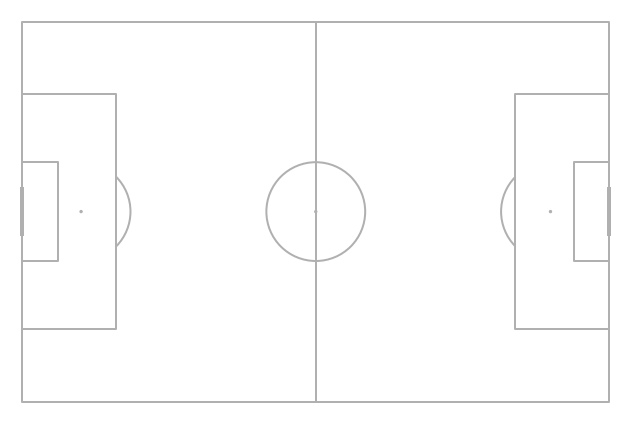

In [78]:
pitch = mplsoccer.Pitch(pitch_type="wyscout")
fig, ax = pitch.draw(figsize=(14, 6))

In [79]:
shots_df["X"] = shots_df["X"].multiply(100)
shots_df["Y"] = shots_df["Y"].multiply(100)

In [80]:
crisPlotData = shots_df[shots_df["Player"] == "Cristiano"].copy(deep=True)

In [81]:
messiPlotData = shots_df[shots_df["Player"] == "Messi"].copy(deep=True)

## Plot HeatMaps

In [82]:
from scipy.ndimage import gaussian_filter

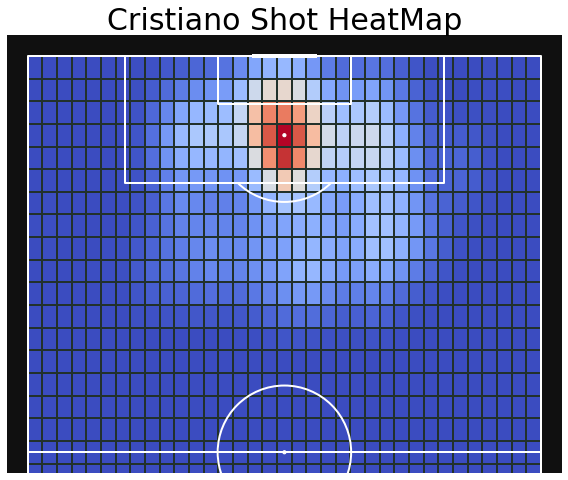

In [83]:
pitch = mplsoccer.VerticalPitch(pitch_type="wyscout",
                                line_color='white',
                                line_zorder=2,
                                pitch_color='#101010',
                                half=True)
fig, ax = pitch.draw(figsize=(8, 8))
bin_statistic = pitch.bin_statistic(crisPlotData["X"],
                                    crisPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='coolwarm', edgecolors='#22312b')
ax.set_title("Cristiano Shot HeatMap", fontsize=30)
fig.savefig("cristiano_shot_map.png")

Text(0.5, 1.0, 'Messi Shot HeatMap')

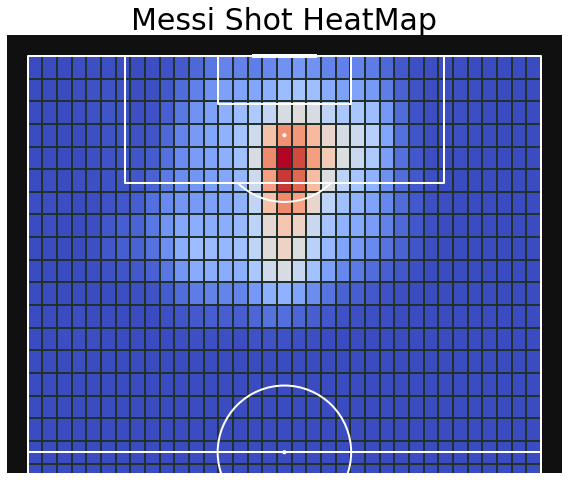

In [84]:
pitch = mplsoccer.VerticalPitch(pitch_type="wyscout",
                                line_color='white',
                                line_zorder=2,
                                pitch_color='#101010',
                                half=True)
fig, ax = pitch.draw(figsize=(8, 8))
bin_statistic = pitch.bin_statistic(messiPlotData["X"],
                                    messiPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='coolwarm', edgecolors='#22312b')
ax.set_title("Messi Shot HeatMap", fontsize=30)

Text(0.5, 1.0, 'Messi Shot HeatMap')

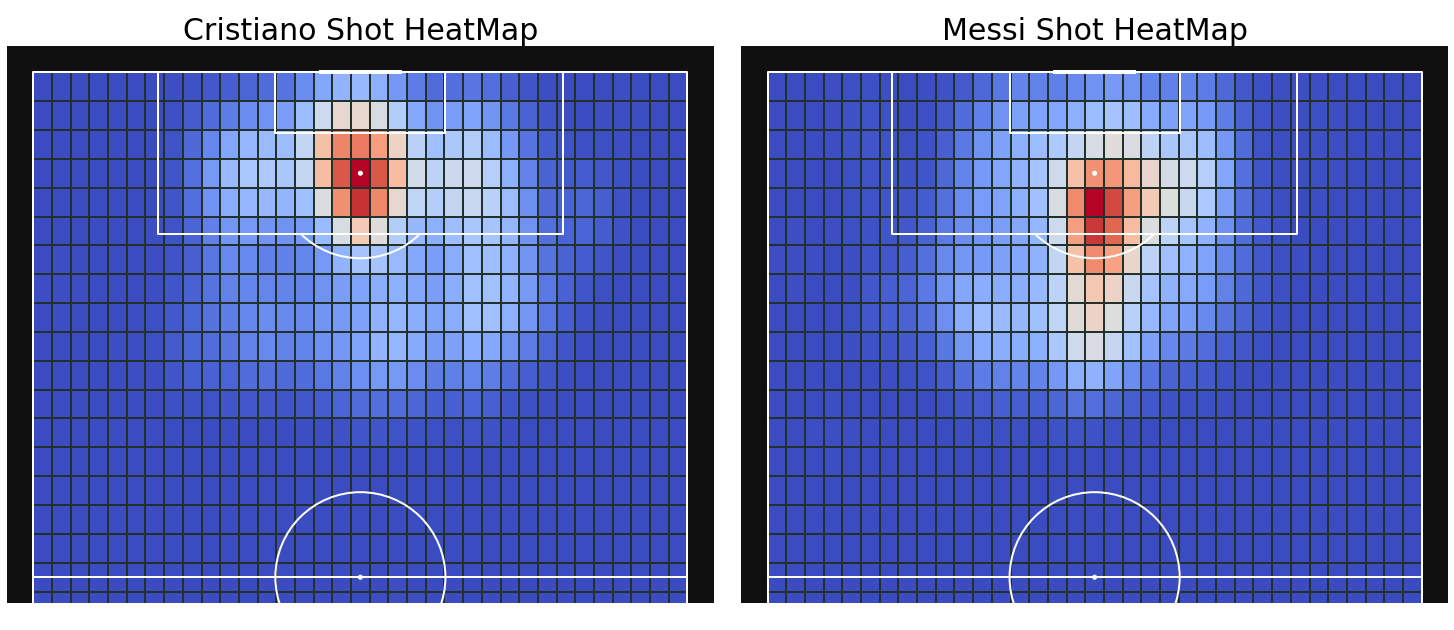

In [85]:
pitch = mplsoccer.VerticalPitch(pitch_type="wyscout",
                                line_color='white',
                                line_zorder=2,
                                pitch_color='#101010',
                                half=True)
fig, axs = pitch.grid(nrows=1, ncols=2,
                     endnote_height=0.03, endnote_space=0,
                      grid_width=0.88, left=0.025,
                      title_height=0.06, title_space=0,
                      axis=False,
                      grid_height=0.86)

# Cristiano:
ax = axs["pitch"][0]
bin_statistic = pitch.bin_statistic(crisPlotData["X"],
                                    crisPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='coolwarm', edgecolors='#22312b')
ax.set_title("Cristiano Shot HeatMap", fontsize=30)

# Messi:
ax = axs["pitch"][1]
bin_statistic = pitch.bin_statistic(messiPlotData["X"],
                                    messiPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='coolwarm', edgecolors='#22312b')
ax.set_title("Messi Shot HeatMap", fontsize=30)

In [86]:
shots_df.situation.unique()

array(['SetPiece', 'OpenPlay', 'Penalty', 'DirectFreekick', 'FromCorner'],
      dtype=object)

Text(0.5, 1.0, 'Messi Shot HeatMap')

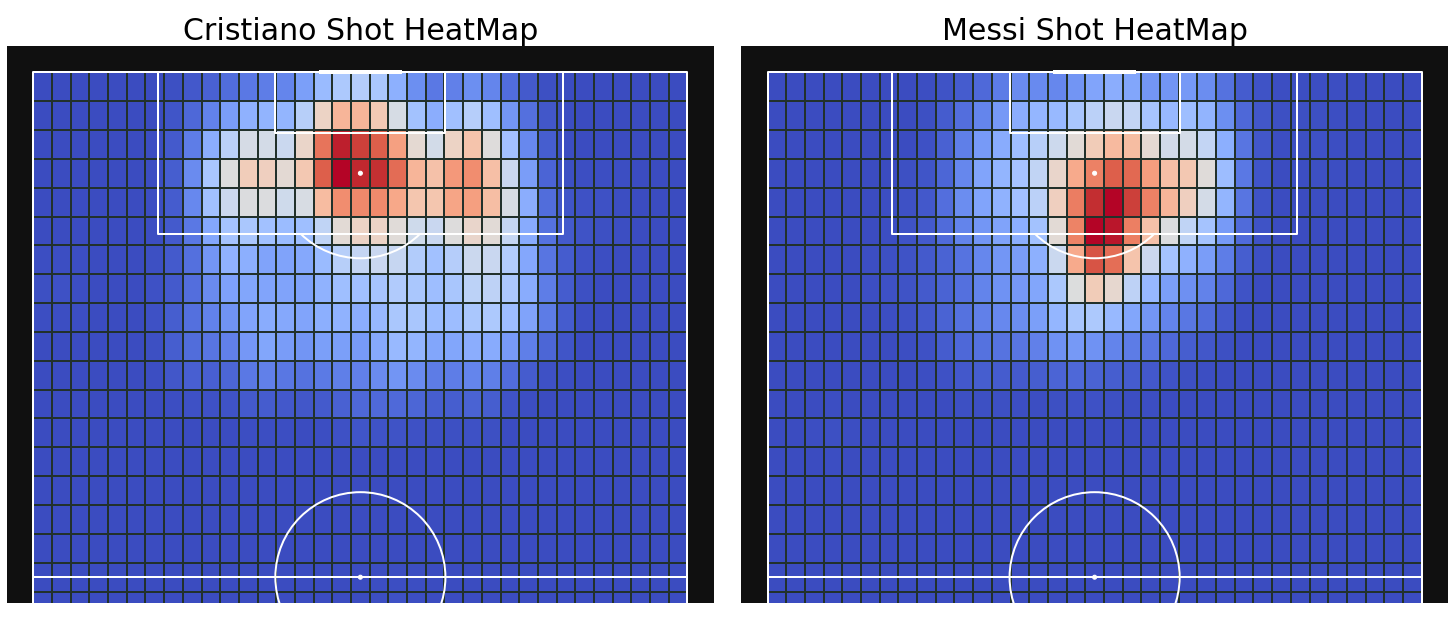

In [87]:
""" Shot Heatmaps (excluding penalties) """
wopCrisPlotData = crisPlotData.loc[crisPlotData["situation"] == "OpenPlay"].copy(deep=True)
wopMessiPlotData = messiPlotData.loc[messiPlotData["situation"] == "OpenPlay"].copy(deep=True)

pitch = mplsoccer.VerticalPitch(pitch_type="wyscout",
                                line_color='white',
                                line_zorder=2,
                                pitch_color='#101010',
                                half=True)
fig, axs = pitch.grid(nrows=1, ncols=2,
                     endnote_height=0.03, endnote_space=0,
                      grid_width=0.88, left=0.025,
                      title_height=0.06, title_space=0,
                      axis=False,
                      grid_height=0.86)

# Cristiano:
ax = axs["pitch"][0]
bin_statistic = pitch.bin_statistic(wopCrisPlotData["X"],
                                    wopCrisPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='coolwarm', edgecolors='#22312b')
ax.set_title("Cristiano Shot HeatMap", fontsize=30)

# Messi:
ax = axs["pitch"][1]
bin_statistic = pitch.bin_statistic(wopMessiPlotData["X"],
                                    wopMessiPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='coolwarm', edgecolors='#22312b')
ax.set_title("Messi Shot HeatMap", fontsize=30)

Text(0.5, 1.0, 'Messi Shot HeatMap (w/o Pens)')

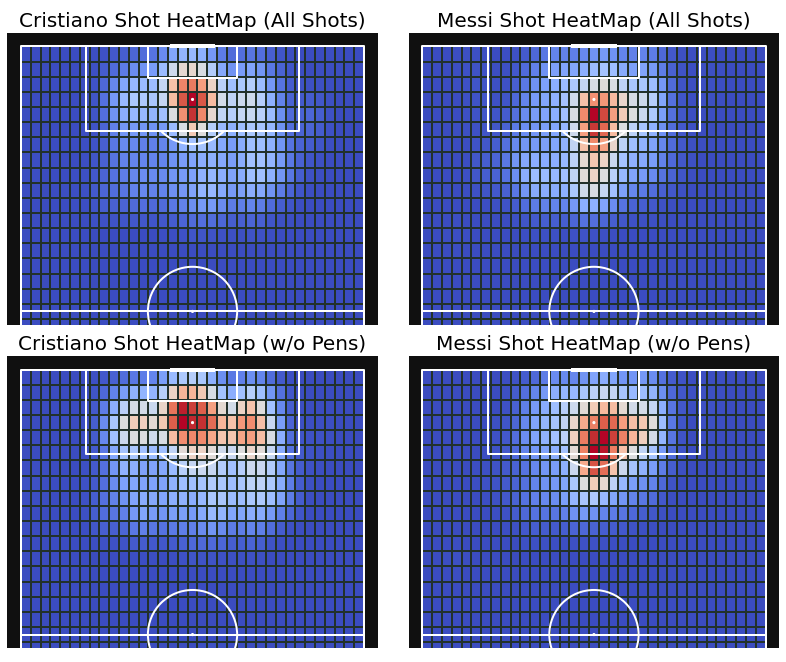

In [88]:
""" Shot Heatmaps (including and excluding penalties) """
pitch = mplsoccer.VerticalPitch(pitch_type="wyscout",
                                line_color='white',
                                line_zorder=2,
                                pitch_color='#101010',
                                half=True)
fig, axs = pitch.grid(nrows=2, ncols=2,
                      endnote_height=0.01, endnote_space=0,
                      grid_width=0.95, left=0.02,
                      title_height=0.04, title_space=0,
                      axis=False,
                      grid_height=0.95)

# Cristiano with pen:
ax = axs["pitch"][0, 0]
bin_statistic = pitch.bin_statistic(crisPlotData["X"],
                                    crisPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='coolwarm', edgecolors='#22312b')
ax.set_title("Cristiano Shot HeatMap (All Shots)", fontsize=20)

# Messi with pen:
ax = axs["pitch"][0, 1]
bin_statistic = pitch.bin_statistic(messiPlotData["X"],
                                    messiPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='coolwarm', edgecolors='#22312b')
ax.set_title("Messi Shot HeatMap (All Shots)", fontsize=20)

# Cristiano without pen:
ax = axs["pitch"][1, 0]
bin_statistic = pitch.bin_statistic(wopCrisPlotData["X"],
                                    wopCrisPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='coolwarm', edgecolors='#22312b')
ax.set_title("Cristiano Shot HeatMap (w/o Pens)", fontsize=20)

# Messi wo pen:
ax = axs["pitch"][1, 1]
bin_statistic = pitch.bin_statistic(wopMessiPlotData["X"],
                                    wopMessiPlotData["Y"],
                                    statistic='count', bins=(35, 35))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax,
                    cmap='coolwarm', edgecolors='#22312b')
ax.set_title("Messi Shot HeatMap (w/o Pens)", fontsize=20)

# Distance Analysis

## Per 90 Columns

In [89]:
season_wise_meta_df.columns

Index(['Player', 'position', 'games', 'goals', 'shots', 'time', 'xG',
       'assists', 'xA', 'key_passes', 'season', 'team', 'yellow', 'red', 'npg',
       'npxG', 'xGChain', 'xGBuildup', 'xGDiff', 'goal_contrib',
       'xgoal_contrib', 'shot_contrib', 'goals_p90', 'shots_p90', 'time_p90',
       'xG_p90', 'assists_p90', 'xA_p90', 'key_passes_p90', 'npg_p90',
       'npxG_p90', 'xGChain_p90', 'xGBuildup_p90', 'xGDiff_p90',
       'goal_contrib_p90', 'xgoal_contrib_p90', 'shot_contrib_p90'],
      dtype='object')

In [90]:
num_cols

['goals',
 'shots',
 'time',
 'xG',
 'assists',
 'xA',
 'key_passes',
 'npg',
 'npxG',
 'xGChain',
 'xGBuildup',
 'xGDiff',
 'goal_contrib',
 'xgoal_contrib',
 'shot_contrib']

In [91]:
for col in num_cols:
    season_wise_meta_df[col + "_p90"] = season_wise_meta_df[col].divide(season_wise_meta_df["time"]).multiply(90).round(2)

## Goals vs Shots (per season)

In [92]:
season_wise_meta_df.columns

Index(['Player', 'position', 'games', 'goals', 'shots', 'time', 'xG',
       'assists', 'xA', 'key_passes', 'season', 'team', 'yellow', 'red', 'npg',
       'npxG', 'xGChain', 'xGBuildup', 'xGDiff', 'goal_contrib',
       'xgoal_contrib', 'shot_contrib', 'goals_p90', 'shots_p90', 'time_p90',
       'xG_p90', 'assists_p90', 'xA_p90', 'key_passes_p90', 'npg_p90',
       'npxG_p90', 'xGChain_p90', 'xGBuildup_p90', 'xGDiff_p90',
       'goal_contrib_p90', 'xgoal_contrib_p90', 'shot_contrib_p90'],
      dtype='object')

In [93]:
x = "shots_p90"; y="goals_p90"
fig = px.scatter(x=x, y=y, data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season", color="season", size="npg_p90",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df[x].min(), season_wise_meta_df[x].max()],
                         y=[season_wise_meta_df[y].mean(), season_wise_meta_df[y].mean()],
                         name="Avg. Goals"))
fig.add_trace(go.Scatter(x=[season_wise_meta_df[x].mean(), season_wise_meta_df[x].mean()],
                         y=[season_wise_meta_df[y].min(), season_wise_meta_df[y].max()],
                         name="Avg. Shots"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=700, width=1200)
fig.update(layout_coloraxis_colorbar_len=0.5, layout_coloraxis_colorbar_y=0.4)
fig.show()

## Total Goals vs Total Expected Goals (per season)

In [94]:
x_col="goals_p90"; y_col="xG_p90"
fig = px.scatter(y=y_col, x=x_col, data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df[[x_col, y_col]].min().min(),
                            season_wise_meta_df[[x_col, y_col]].max().max()],
                         y=[season_wise_meta_df[[x_col, y_col]].min().min(),
                            season_wise_meta_df[[x_col, y_col]].max().max()]))
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=700, width=1000)

# The Final Comparison

In [95]:
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup,xGDiff,goal_contrib,xgoal_contrib,shot_contrib,goals_p90,shots_p90,time_p90,xG_p90,assists_p90,xA_p90,key_passes_p90,npg_p90,npxG_p90,xGChain_p90,xGBuildup_p90,xGDiff_p90,goal_contrib_p90,xgoal_contrib_p90,shot_contrib_p90
2,Cristiano,FW,33,29,167,2807,29.84,3,3.85,36,2020,Juventus,3,0,23,23.75,28.64,8.92,-0.84,32,33.7,206,0.93,5.35,90.0,0.96,0.10,0.12,1.15,0.74,0.76,0.92,0.29,-0.03,1.03,1.08,6.60
3,Cristiano,FWL,33,31,208,2920,29.43,5,6.07,51,2019,Juventus,3,0,19,19.53,26.55,7.22,1.57,36,35.5,264,0.96,6.41,90.0,0.91,0.15,0.19,1.57,0.59,0.60,0.82,0.22,0.05,1.11,1.09,8.14
4,Cristiano,FW,31,21,175,2692,23.32,8,5.19,48,2018,Juventus,3,0,16,18.76,21.85,7.18,-2.32,29,28.5,231,0.70,5.85,90.0,0.78,0.27,0.17,1.60,0.53,0.63,0.73,0.24,-0.08,0.97,0.95,7.72
5,Cristiano,FW,27,26,178,2304,27.00,5,5.52,40,2017,Real Madrid,1,0,23,24.03,31.62,9.47,-1.00,31,32.5,223,1.02,6.95,90.0,1.05,0.20,0.22,1.56,0.90,0.94,1.24,0.37,-0.04,1.21,1.27,8.71
6,Cristiano,FWL,29,25,162,2546,25.41,6,4.59,31,2016,Real Madrid,4,0,19,19.47,29.57,8.66,-0.41,31,30.0,199,0.88,5.73,90.0,0.90,0.21,0.16,1.10,0.67,0.69,1.05,0.31,-0.01,1.10,1.06,7.03
7,Cristiano,AML,36,35,227,3186,35.59,11,8.61,51,2015,Real Madrid,3,0,29,28.90,40.82,9.86,-0.59,46,44.2,289,0.99,6.41,90.0,1.01,0.31,0.24,1.44,0.82,0.82,1.15,0.28,-0.02,1.30,1.25,8.16
8,Cristiano,FWL,35,48,225,3103,39.31,16,13.60,76,2014,Real Madrid,5,1,38,30.39,43.61,7.52,8.69,64,52.9,317,1.39,6.53,90.0,1.14,0.46,0.39,2.20,1.10,0.88,1.26,0.22,0.25,1.86,1.53,9.19
1,Messi,FW,35,30,195,3017,26.68,9,11.42,77,2020,Barcelona,4,0,27,22.96,37.91,20.34,3.32,39,38.1,281,0.89,5.82,90.0,0.80,0.27,0.34,2.30,0.81,0.68,1.13,0.61,0.10,1.16,1.14,8.38
2,Messi,Sub,33,25,159,2876,20.85,20,16.59,88,2019,Barcelona,4,0,20,17.13,34.92,13.54,4.15,45,37.4,267,0.78,4.98,90.0,0.65,0.63,0.52,2.75,0.63,0.54,1.09,0.42,0.13,1.41,1.17,8.36
3,Messi,FW,34,36,170,2704,26.00,13,15.34,93,2018,Barcelona,3,0,32,22.28,38.46,10.70,10.00,49,41.3,276,1.20,5.66,90.0,0.87,0.43,0.51,3.10,1.07,0.74,1.28,0.36,0.33,1.63,1.37,9.19


In [96]:
radar_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().reset_index()

In [97]:
radar_df

,Player,goals,shots,time,xG,assists,xA,key_passes,npg,npxG,xGChain,xGBuildup,xGDiff,goal_contrib,xgoal_contrib,shot_contrib
0,Cristiano,215,1342,19558,209.90,54,47.43,333,167,164.83,222.66,58.83,5.10,269,257.3,1729
1,Messi,231,1244,20524,192.36,97,105.89,596,203,163.35,298.75,119.30,38.64,328,298.1,1937


In [98]:
radar_df.columns

Index(['Player', 'goals', 'shots', 'time', 'xG', 'assists', 'xA', 'key_passes',
       'npg', 'npxG', 'xGChain', 'xGBuildup', 'xGDiff', 'goal_contrib',
       'xgoal_contrib', 'shot_contrib'],
      dtype='object')

In [99]:
cols_for_radar = ['goals', 'shots', 'xG', 'xGDiff',
                  'assists', 'xA', 'key_passes',
                  'npg', 'npxG', 'goal_contrib', 'xgoal_contrib', 'shot_contrib']

## Radar Plot for Comparison Analysis

In [100]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Cristiano"), cols_for_radar].values.flatten(),
    theta=cols_for_radar,
    fill='toself',
    name='Cristiano'))
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Messi"), cols_for_radar].values.flatten(),
    theta=cols_for_radar,
    fill='toself',
    name="Messi"))
# Additional properties for the plot:
fig.update_layout(
    title="Cristiano vs Messi",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True,
template="plotly_dark"
)
fig.show()

## Per90 Radar Plot

In [101]:
per_90_cols

['goals_p90',
 'shots_p90',
 'xG_p90',
 'assists_p90',
 'xA_p90',
 'key_passes_p90',
 'npg_p90',
 'npxG_p90',
 'xGChain_p90',
 'xGBuildup_p90',
 'xGDiff_p90',
 'goal_contrib_p90',
 'xgoal_contrib_p90',
 'shot_contrib_p90']

In [102]:
cols_for_radar = ['goals_p90',
 'shots_p90',
 'xG_p90',
 'xGDiff_p90',
 'assists_p90',
 'xA_p90',
 'key_passes_p90',
 'npg_p90',
 'npxG_p90',
 'goal_contrib_p90',
 'xgoal_contrib_p90',
 'shot_contrib_p90']

In [103]:
radar_df = season_wise_meta_df.groupby(["Player"])[cols_for_radar].sum().reset_index()

In [104]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Cristiano"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name='Cristiano'))
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Messi"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name="Messi"))
# Additional properties for the plot:
fig.update_layout(
    title="Cristiano vs Messi",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True,
template="plotly_dark"
)
fig.show()

# ================== Debate - 2nd Round ==================
